# Frequent Pattern Mining

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth
import timeit

## Import Dataset and Preprocessing

#### First, I read the dataset using the read_csv function of the pandas library and use it as dataframe.

In [2]:
df = pd.read_csv('data.csv')
print("Length of Dataframe:", len(df))
df.head()

Length of Dataframe: 38765


,Member_no,Date,item
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


#### I convert the date feature, which is the string value in the dataset, to datetime.                   
#### Then I sorted the dataframe by date to make it more organized.

In [3]:
for i in range(len(df['Date'])):
    date = df['Date'][i]
    new_date = date[:2] + "-" + date[3:5] + "-" + date[6:10]
    df.loc[i]["Date"] = new_date
df['Date'] = pd.to_datetime(df['Date'])

df = df.sort_values(by='Date')
df = df.reset_index()
df = df.drop(['index'], axis=1)
df.head()

,Member_no,Date,item
0,1381,2014-01-01,curd
1,2226,2014-01-01,sausage
2,1659,2014-01-01,frozen vegetables
3,2610,2014-01-01,hamburger meat
4,3942,2014-01-01,other vegetables


#### I plotted the most purchased 10 items in the dataset.

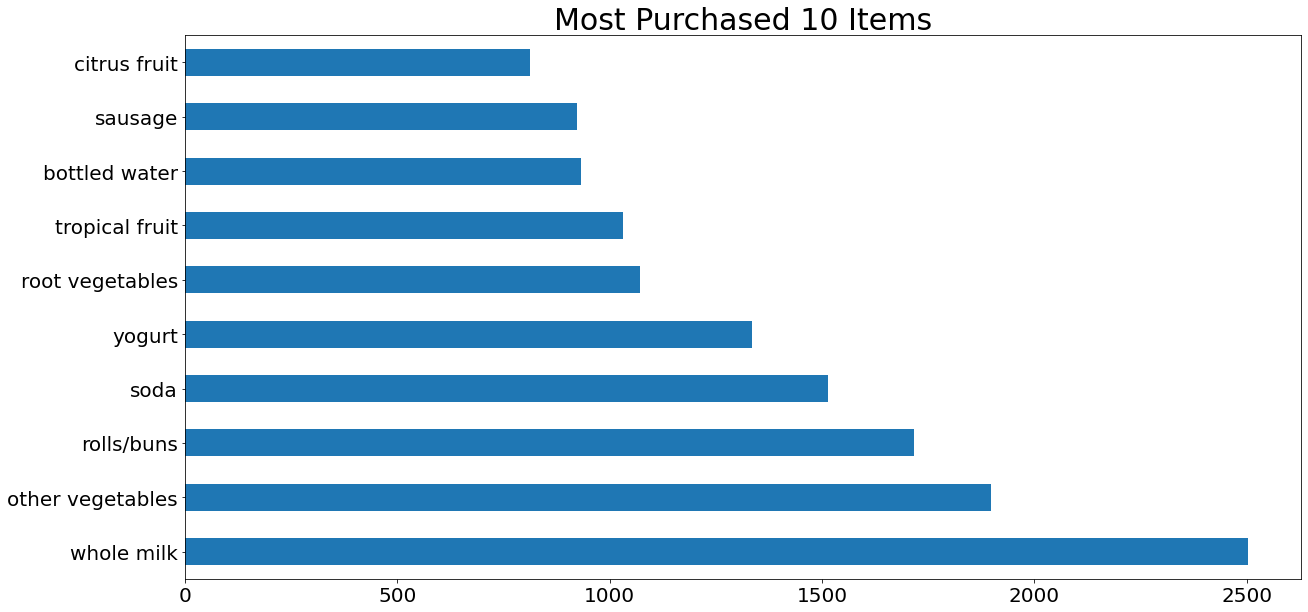

In [4]:
top_10_items = df['item'].value_counts()[:10]
top_10_items.plot(kind="barh", figsize=(20,10), fontsize=20)
plt.title("Most Purchased 10 Items", fontsize = 30)
plt.show()

#### We need to do in this dataset is to determine all the shopping made by each member that day. For this, I combined the items with the same Member_no and Date feature in a list, so that I found all the shopping made by each person on a certain day and created the transactions.

#### In order to do this, I created a list called transactions and put the items that a person bought in a day into this list.

In [5]:
transactions = []
date = df.groupby(by="Date")
for _, i in date:
    mem = i.groupby("Member_no")
    for _, j in mem:
        transactions.append(list(j["item"]))

#### So the transactions are ready to use in the algorithms.

In [6]:
print("Length of the transactions list is:", len(transactions))
transactions[:5]

Length of the transactions list is: 14963


[['citrus fruit', 'coffee'],
 ['curd', 'soda'],
 ['yogurt', 'other vegetables'],
 ['frozen vegetables', 'specialty chocolate'],
 ['candles', 'hamburger meat']]

#### I transform it into the right format with using the mlxtend library

In [7]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
print("Number of Transactions:", len(df))
df

Number of Transactions: 14963


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Implementing Apriori Algorithm

#### Return the items and itemsets with at least 1% support using Apriori Algorithm:

In [8]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.021386,(UHT-milk),1
1,0.033950,(beef),1
2,0.021787,(berries),1
3,0.016574,(beverages),1
4,0.045312,(bottled beer),1
...,...,...,...
64,0.010559,"(other vegetables, rolls/buns)",2
65,0.014837,"(whole milk, other vegetables)",2
66,0.013968,"(whole milk, rolls/buns)",2
67,0.011629,"(soda, whole milk)",2


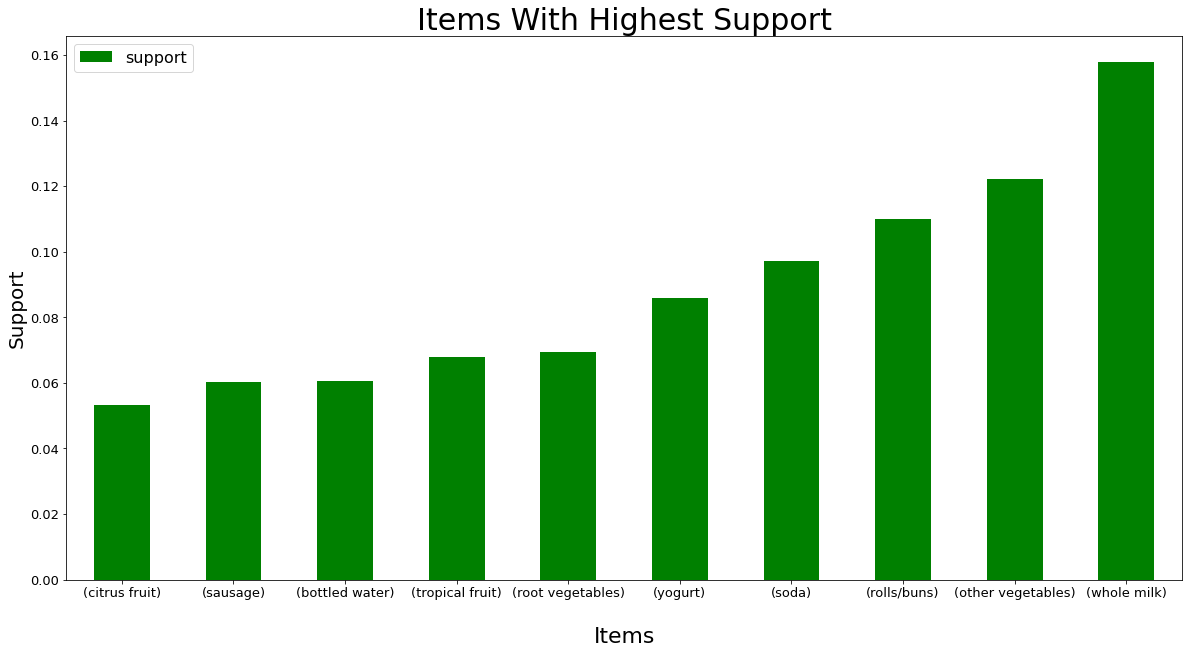

In [9]:
max_support_10 = frequent_itemsets.sort_values("support")[-10:]
max_support_10.drop("length", axis=1)
max_support_10.plot.bar(x='itemsets', y='support', rot=0, figsize=(20,10), fontsize=13, color='g')
plt.title("Items With Highest Support", fontsize = 30)
plt.xlabel('\nItems', fontsize=22)
plt.ylabel('Support', fontsize=20)
plt.legend(loc=2, prop={'size': 16})
plt.show()

#### Itemsets with a length of 2 or more:

In [10]:
length_2_items = frequent_itemsets[(frequent_itemsets['length'] >= 2)]
length_2_items

,support,itemsets,length
64,0.010559,"(other vegetables, rolls/buns)",2
65,0.014837,"(whole milk, other vegetables)",2
66,0.013968,"(whole milk, rolls/buns)",2
67,0.011629,"(soda, whole milk)",2
68,0.011161,"(whole milk, yogurt)",2


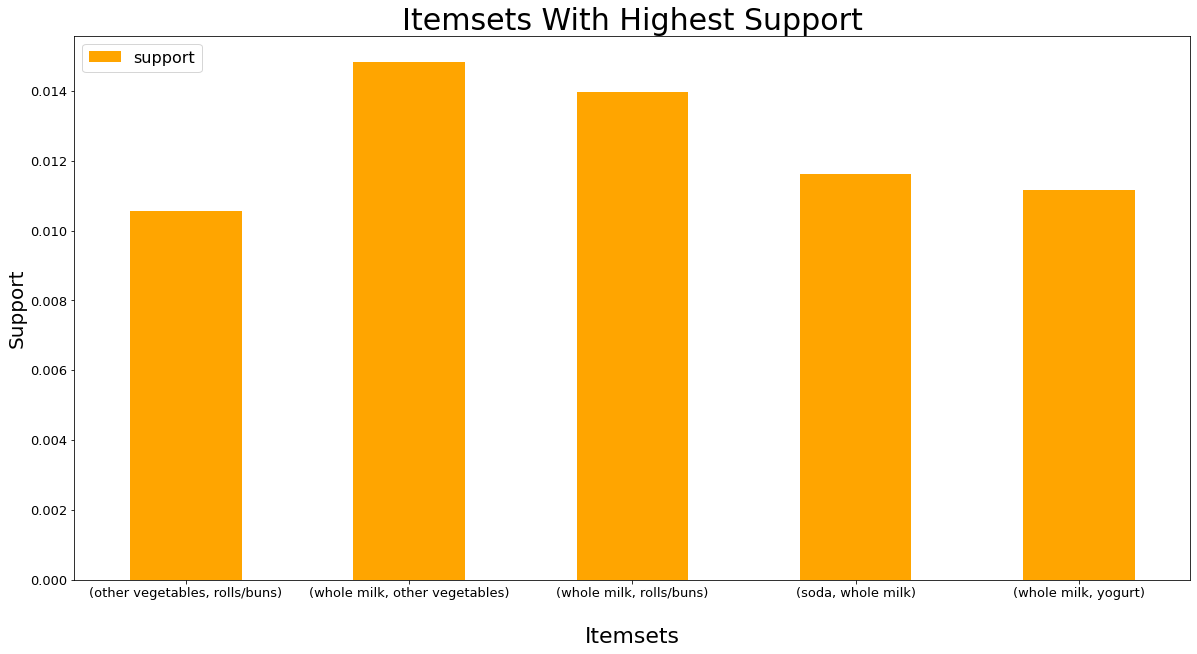

In [11]:
length_2_items.drop("length", axis=1)
length_2_items.plot.bar(x='itemsets', y='support', rot=0, figsize=(20,10), fontsize=13, color='orange')
plt.title("Itemsets With Highest Support", fontsize = 30)
plt.xlabel('\nItemsets', fontsize=22)
plt.ylabel('Support', fontsize=20)
plt.legend(loc=2, prop={'size': 16})
plt.show()

## Implementing FPGrowth Algorithm

#### Return the items and itemsets with at least 1% support using FPGrowth algorithm:

In [12]:
frequent_itemsets = fpgrowth(df, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.053131,(citrus fruit),1
1,0.031611,(coffee),1
2,0.097106,(soda),1
3,0.033683,(curd),1
4,0.122101,(other vegetables),1
...,...,...,...
64,0.011629,"(soda, whole milk)",2
65,0.014837,"(whole milk, other vegetables)",2
66,0.011161,"(whole milk, yogurt)",2
67,0.013968,"(whole milk, rolls/buns)",2


#### Itemsets with a length of 2 or more:

In [13]:
frequent_itemsets[(frequent_itemsets['length'] >= 2)]

,support,itemsets,length
64,0.011629,"(soda, whole milk)",2
65,0.014837,"(whole milk, other vegetables)",2
66,0.011161,"(whole milk, yogurt)",2
67,0.013968,"(whole milk, rolls/buns)",2
68,0.010559,"(other vegetables, rolls/buns)",2


## Time Comparison of Apriori & FPGrowth

In [14]:
print("Apriori Algorithm:")
starttime = timeit.default_timer()
%timeit -n 100 -r 10 apriori(df, min_support=0.01)
apr_time = timeit.default_timer() - starttime

Apriori Algorithm:
186 ms ± 11.1 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [15]:
print("FPGrowth Algorithm:")
starttime = timeit.default_timer()
%timeit -n 100 -r 10 fpgrowth(df, min_support=0.01)
fpg_time = timeit.default_timer() - starttime

FPGrowth Algorithm:
102 ms ± 2.59 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)


#### We can see that FPGrowth is faster than Apriori.

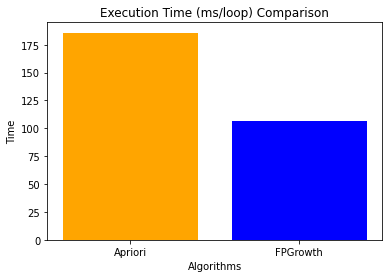

In [22]:
execution_times = [apr_time, fpg_time]
algo_names = ("Apriori", "FPGrowth")
y = np.arange(len(algo_names))
plt.bar(y,execution_times,color=['orange', 'blue'])
plt.xticks(y,algo_names)
plt.xlabel('Algorithms')
plt.ylabel('Time')
plt.title("Execution Time (ms/loop) Comparison")
plt.show()

## Summarization

##### Patterns that frequently show up in the database are called frequent patterns. Finding frequent patterns, relationships, or causal structures from datasets is an analytical process. This process try to identify the transactional item that comes up frequently. 
##### We can determine strongly correlated items together and identify similar associations between them with frequent patterns.
##### We examined Apriori and FPGrowth, which are two frequently used frequent pattern mining algorithms in this assignment, and finally we observed that FPGrowth works faster than Apriori. Apart from that, I have stated the main differences of these two algorithms below.



| Apriori | FPGrowth |
| --- | --- |
| It uses breadth-first search | It uses a depth-first search |
| Array based algorithm | Tree based algorithm |
| Requires large memory space | Requires less memory space |
| It scans the database multiple times for generating candidate sets. | It scans the database only twice for constructing frequent pattern tree. |
| Slower than FPGrowth | Faster than Apriori |
